Used PCA for visualization, taking 784-D dataset converting it into a 2-D dataset and visualize this on a 2-D plane having 1ˢᵗ principle component on x-axis and 2ⁿᵈ principle component on y-axis.

Other applications of PCA
- Convert 784-D dataset into 10-D dataset to train Machine Learning models. 
- Convert the data from D to D' where D' <= D

Let us assume we want to convert 784-D dataset to 200-D dataset.
Let there be a matrix X₁₅₀₀₀ₓ₇₈₄ and multiply with matrix v₇₈₄ₓ₂₀₀(composed of top 200 Eigen vectors)

If we take co-variance matrix of X, C = XᵀX, X is already standardized. For covariance-matrix, we compute Eigen values λᵢ : i -> 1 to 784 and Eigen vectors vᵢ : i -> 1 to 784. The largest Eigen value is λ₁ and the largest Eigen vector is v₁ corresponding to λ₁.

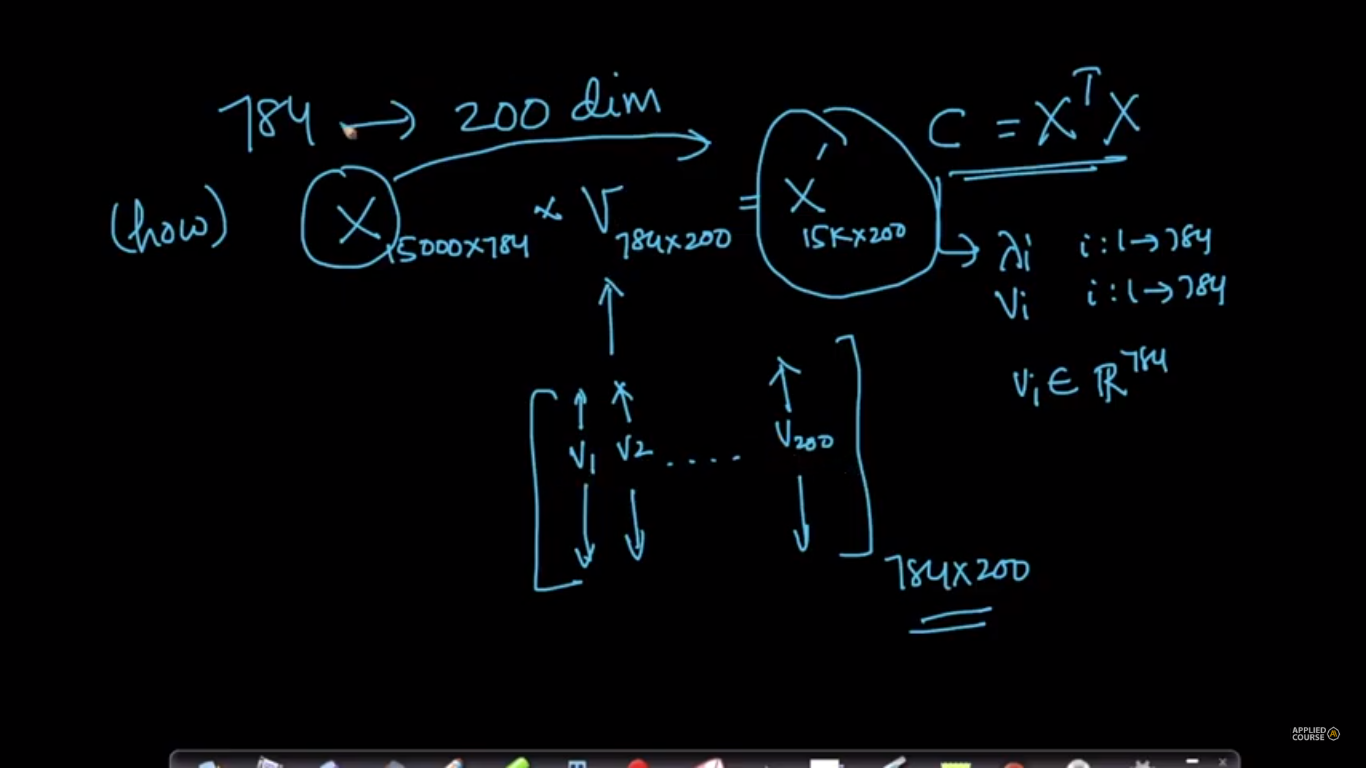

By stacking up each of the Eigen vectors I created a matrix of 784 X 200.

<b><i>Converting 784-D to 200-D using PCA </i></b>
Multiplying X₁₅₀₀₀ₓ₇₈₄ v₇₈₄ₓ₂₀₀ = X'₁₅₀₀₀ₓ₂₀₀. 

X' is a representation of data points X in 200-D space.

If we want to create visualizations, we consider only 2-D or 3-D.
What is the right dimension number to reduce to if we do not want to visualize the data? - 10, 20, 50, 100, 200, 500, 700

<b><i>Fundamentals of PCA - try to maximize variance of projected points. </i></b>

If we go to 10-D, 20-D from 784-D how much of the original variance is explained by the desired number of dimensions taken into account.

PCA for a given matrix X, computed the co-variance matrix C = XᵀX. For the co-variance matrix we computed the Eigen values λᵢ and Eigen vectors vᵢ. 

The problem is we use the Eigen vectors vᵢ but never use the Eigen values λᵢ.

Let us have λ₁ >= λ₂ >= ... >= λ₇₈₄

If we want to reduce our dataset from 784-D to 10-D, what is the variance that is already explained / retained in 10D.

Take the top 10 Eigen values / summation of all the Eigen values tells the percentage is explained.

Formula to reduce 784-D to 10-D ---> λ₁ + λ₂ + ... + λ₁₀ / Σ λᵢ ( i = 1 to 784 ) = percentage of variance that is explained in 10-D.( Let us assume it is 0.2 i.e. 20% of the total variance in 784-D is explained/retained in 10-D.)

<h6>Generally the proposition is if we want to reduce our dataset from 784-D to D' dimensions through PCA, we would like to retain 90% of the variance. Now we have find the right D' which does this

λ₁ + λ₂ + ... + λD' / Σ λᵢ ( i = 1 to D ) = 0.9</h6>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# In CSV file, the first row is a header which tells us what are the fields - column names
d0 = pd.read_csv('./mnist_train.csv') # reading the file

print(d0.head(5)) # print first 5 rows of d0.

# The first column tells what are the digits it is representing. 
# The rest of the 784 columns indexed from pixel0 to pixel783.

# l stores all the class labels - save the variables into a variable l.
l = d0['label']

# d stores all the data - Drop the label feature and store the pixel data in d.
d = d0.drop("label", axis=1)

# d[i] ---> l[i], if we take iᵗʰ row of d, the corresponding label will be l[i]

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [9]:
# Pick the first 15k data-points to work on for time-efficiency.
labels = l.head(15000)
data = d.head(15000)

print("The shape of the sample data = ", data.shape)

The shape of the sample data =  (15000, 784)


In [10]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [11]:
# Find the co-variance matrix which is A^T * T
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of the co-variance matrix = ", covar_matrix.shape)

The shape of the co-variance matrix =  (784, 784)


In [12]:
# initializing the PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [13]:
# Configuring the parameters
# The number of parameters = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca_reduced will contain the 2-D projects of the sample data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


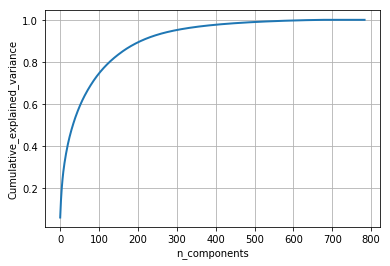

In [19]:
# PCA for dimensionality reduction (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

#Plot PCA spectrum

plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

If we go from 784-D to 100-D, 75% of the variance is explained.

If we go from 784-D to 200-D using PCA, 90% of the variance is explained.

If we go from 784-D to 350-D using PCA, 95% of the variance is explained. (Used in ML-models)

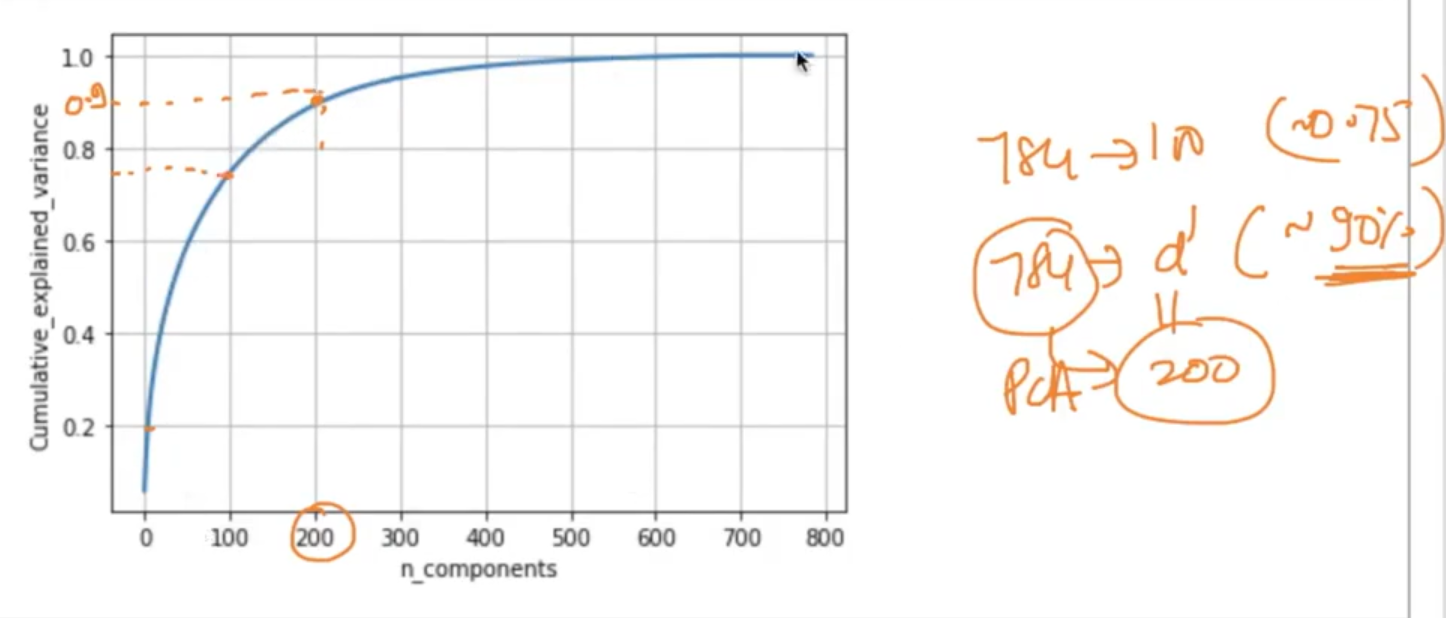